# PERFORM WEB SCRAPING ON BOOK STORE http://books.toscrape.com/

In [1]:
!pip install requests
!pip install bs4

In [2]:
import requests #to make request to the required page
import bs4 #contains beautifulSoup for pulling data out of HTML and XML files
import pandas as pd #to convert our data to a dataframe


In [3]:
# creating empty lists
pages=[]
prices=[]
ratings=[]
title=[]
urls=[]



no_of_pages=int(input('How many pages '))     #number of pages to be selected

#looping through the required pages and selecting the pages accordingly
for i in range(1,no_of_pages+1):      #to include last page
    url=('http://books.toscrape.com/catalogue/page-{}.html'.format(i))
    
    pages.append(url)    #adding all the content of the respective pages to our created page list
pages

How many pages 5


['http://books.toscrape.com/catalogue/page-1.html',
 'http://books.toscrape.com/catalogue/page-2.html',
 'http://books.toscrape.com/catalogue/page-3.html',
 'http://books.toscrape.com/catalogue/page-4.html',
 'http://books.toscrape.com/catalogue/page-5.html']

### Getting the data from the particular page url and converting from object of type 'request to object of type beautiful soup, making it more readable

In [4]:
for item in pages:
    page=requests.get(item)
    soup=bs4.BeautifulSoup(page.text,'html.parser')
    
print(soup)


<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:31" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="../static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="../static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link 

#### In an actual html tag, it includes indentations and nested tags that helps you to identify the actual relationship between tags and so forth. In order to get that identation and relationship here, we have to use what is called prettify().

#### “prettify()” is a built-in function provided by the Beautiful Soup module which gives the visual representation of the parsed URL Source code. i.e. it arranges all the tags in a parse-tree manner with better readability.

In [5]:
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   All products | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="24th Jun 2016 09:31" name="created"/>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="NOARCHIVE,NOCACHE" name="robots"/>
  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
  <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
  <link href="../static/oscar/favicon.ico" rel="shortcut icon"/>
  <link href="../static/oscar/css/styles.css" rel="stylesheet" typ

### Finding all the Titles

In [6]:
#prints all titles
for t in soup.findAll('h3'):
    print(t)

<h3><a href="princess-jellyfish-2-in-1-omnibus-vol-01-princess-jellyfish-2-in-1-omnibus-1_920/index.html" title="Princess Jellyfish 2-in-1 Omnibus, Vol. 01 (Princess Jellyfish 2-in-1 Omnibus #1)">Princess Jellyfish 2-in-1 Omnibus, ...</a></h3>
<h3><a href="princess-between-worlds-wide-awake-princess-5_919/index.html" title="Princess Between Worlds (Wide-Awake Princess #5)">Princess Between Worlds (Wide-Awake ...</a></h3>
<h3><a href="pop-gun-war-volume-1-gift_918/index.html" title="Pop Gun War, Volume 1: Gift">Pop Gun War, Volume ...</a></h3>
<h3><a href="political-suicide-missteps-peccadilloes-bad-calls-backroom-hijinx-sordid-pasts-rotten-breaks-and-just-plain-dumb-mistakes-in-the-annals-of-american-politics_917/index.html" title="Political Suicide: Missteps, Peccadilloes, Bad Calls, Backroom Hijinx, Sordid Pasts, Rotten Breaks, and Just Plain Dumb Mistakes in the Annals of American Politics">Political Suicide: Missteps, Peccadilloes, ...</a></h3>
<h3><a href="patience_916/index.html"

In [7]:
#@title
#find all the title and add to our empty title list

for t in soup.findAll('h3'):
    titless=t.getText()
    title.append(titless)
print(title)

['Princess Jellyfish 2-in-1 Omnibus, ...', 'Princess Between Worlds (Wide-Awake ...', 'Pop Gun War, Volume ...', 'Political Suicide: Missteps, Peccadilloes, ...', 'Patience', 'Outcast, Vol. 1: A ...', 'orange: The Complete Collection ...', 'Online Marketing for Busy ...', 'On a Midnight Clear', 'Obsidian (Lux #1)', 'My Paris Kitchen: Recipes ...', 'Masks and Shadows', 'Mama Tried: Traditional Italian ...', 'Lumberjanes, Vol. 2: Friendship ...', 'Lumberjanes, Vol. 1: Beware ...', 'Lumberjanes Vol. 3: A ...', 'Layered: Baking, Building, and ...', 'Judo: Seven Steps to ...', 'Join', 'In the Country We ...']


In [8]:
titless

'In the Country We ...'

### Finding all the Prices

In [9]:
# the 'p' tag is in the "price color" class. Note- Make sure to add underscore to class i.e. (class_) in order to 
# differentiate from the python inbuilt class
for p in soup.findAll('p',class_='price_color'):  
    price=p.getText()
    prices.append(price)

print(prices)

['Â£13.61', 'Â£13.34', 'Â£18.97', 'Â£36.28', 'Â£10.16', 'Â£15.44', 'Â£48.41', 'Â£46.35', 'Â£14.07', 'Â£14.86', 'Â£33.37', 'Â£56.40', 'Â£14.02', 'Â£46.91', 'Â£45.61', 'Â£19.92', 'Â£40.11', 'Â£53.90', 'Â£35.67', 'Â£22.00']


### Finding all the Ratings

In [10]:
for s in soup.findAll('p',class_='star-rating'):
    print(s)

<p class="star-rating Five">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<p class="star-rating Five">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<p class="star-rating One">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<p class="star-rating Two">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<p class="star-rating Four">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<p class="star-ra

In [11]:
for s in soup.findAll('p',class_='star-rating'):

#divide data into - K containing class and v containg list like ['star-rating', 'Two']     
    for k,v in s.attrs.items():
        star=v[1]                    # using v[1]  to get the desired results i.e. 2nd part (NO.OF stars given)
        ratings.append(star)
        print(star)                   #our star list now contains all of the star-ratings of the books

Five
Five
One
Two
Three
Four
One
One
Three
Two
Two
Two
Four
Two
Three
Two
One
Two
Five
Four


In [12]:
k

'class'

In [13]:
v

['star-rating', 'Four']

### Finding all the URL's of the images

In [14]:
divs= soup.find_all('div',class_='image_container')
print(divs)

[<div class="image_container">
<a href="princess-jellyfish-2-in-1-omnibus-vol-01-princess-jellyfish-2-in-1-omnibus-1_920/index.html"><img alt="Princess Jellyfish 2-in-1 Omnibus, Vol. 01 (Princess Jellyfish 2-in-1 Omnibus #1)" class="thumbnail" src="../media/cache/78/0b/780b2c28122750c2c383846155815bf7.jpg"/></a>
</div>, <div class="image_container">
<a href="princess-between-worlds-wide-awake-princess-5_919/index.html"><img alt="Princess Between Worlds (Wide-Awake Princess #5)" class="thumbnail" src="../media/cache/b7/e8/b7e84b78be3d9bb79b71156a5e5d4e42.jpg"/></a>
</div>, <div class="image_container">
<a href="pop-gun-war-volume-1-gift_918/index.html"><img alt="Pop Gun War, Volume 1: Gift" class="thumbnail" src="../media/cache/c8/2f/c82f629a31b3f47bdb17ac14aa51076d.jpg"/></a>
</div>, <div class="image_container">
<a href="political-suicide-missteps-peccadilloes-bad-calls-backroom-hijinx-sordid-pasts-rotten-breaks-and-just-plain-dumb-mistakes-in-the-annals-of-american-politics_917/index

In [15]:
divs= soup.find_all('div',class_='image_container')
for thumbs in divs:
    tagss=thumbs.find('img',class_='thumbnail')
    print(tagss)

<img alt="Princess Jellyfish 2-in-1 Omnibus, Vol. 01 (Princess Jellyfish 2-in-1 Omnibus #1)" class="thumbnail" src="../media/cache/78/0b/780b2c28122750c2c383846155815bf7.jpg"/>
<img alt="Princess Between Worlds (Wide-Awake Princess #5)" class="thumbnail" src="../media/cache/b7/e8/b7e84b78be3d9bb79b71156a5e5d4e42.jpg"/>
<img alt="Pop Gun War, Volume 1: Gift" class="thumbnail" src="../media/cache/c8/2f/c82f629a31b3f47bdb17ac14aa51076d.jpg"/>
<img alt="Political Suicide: Missteps, Peccadilloes, Bad Calls, Backroom Hijinx, Sordid Pasts, Rotten Breaks, and Just Plain Dumb Mistakes in the Annals of American Politics" class="thumbnail" src="../media/cache/64/44/6444dacdcb9edaadbbd691524622aeb8.jpg"/>
<img alt="Patience" class="thumbnail" src="../media/cache/01/72/01726c619a05114dca75bd840095016d.jpg"/>
<img alt="Outcast, Vol. 1: A Darkness Surrounds Him (Outcast #1)" class="thumbnail" src="../media/cache/cb/00/cb004189f548d75ad430d3ed19e6daa9.jpg"/>
<img alt="orange: The Complete Collection 1

In [16]:
divs= soup.find_all('div',class_='image_container')
for thumbs in divs:
    tagss=thumbs.find('img',class_='thumbnail')
   
    print(tagss['src'])

../media/cache/78/0b/780b2c28122750c2c383846155815bf7.jpg
../media/cache/b7/e8/b7e84b78be3d9bb79b71156a5e5d4e42.jpg
../media/cache/c8/2f/c82f629a31b3f47bdb17ac14aa51076d.jpg
../media/cache/64/44/6444dacdcb9edaadbbd691524622aeb8.jpg
../media/cache/01/72/01726c619a05114dca75bd840095016d.jpg
../media/cache/cb/00/cb004189f548d75ad430d3ed19e6daa9.jpg
../media/cache/03/88/03886a8502ca54dbce0d91c2568ab69d.jpg
../media/cache/ea/9b/ea9b2cb8abbb317402e618445bade1e1.jpg
../media/cache/a1/14/a114d70e7babf110ba42a389078e9a45.jpg
../media/cache/fc/72/fc72f158554b4b4164701e1dfa1153c7.jpg
../media/cache/f5/65/f565af3d9dd20a1ad72a1e7c4157387d.jpg
../media/cache/ff/e8/ffe81bf98f8386ef29e193abfb6f9c1e.jpg
../media/cache/10/c6/10c61093002db1fec4089d8076678624.jpg
../media/cache/d3/15/d3158e8d3546fb90cced3c1d44a92a34.jpg
../media/cache/7e/a0/7ea062007ef00107e3c16d336b41fab2.jpg
../media/cache/5f/b1/5fb1bf88dcfda795606745ce35be5975.jpg
../media/cache/98/d1/98d1c979c4bac9e147a6718946578b0f.jpg
../media/cache

In [17]:
divs= soup.find_all('div',class_='image_container')  #fetching all the div tags in the class called image_container
for thumbs in divs:
    tagss=thumbs.find('img',class_='thumbnail')
    links='http://books.toscrape.com'+str(tagss['src'])
    newlinks=links.replace('..','')        #replacing the dots in beginning of src 
    urls.append(newlinks)                  #it now contains url of all imanges

In [18]:
urls

['http://books.toscrape.com/media/cache/78/0b/780b2c28122750c2c383846155815bf7.jpg',
 'http://books.toscrape.com/media/cache/b7/e8/b7e84b78be3d9bb79b71156a5e5d4e42.jpg',
 'http://books.toscrape.com/media/cache/c8/2f/c82f629a31b3f47bdb17ac14aa51076d.jpg',
 'http://books.toscrape.com/media/cache/64/44/6444dacdcb9edaadbbd691524622aeb8.jpg',
 'http://books.toscrape.com/media/cache/01/72/01726c619a05114dca75bd840095016d.jpg',
 'http://books.toscrape.com/media/cache/cb/00/cb004189f548d75ad430d3ed19e6daa9.jpg',
 'http://books.toscrape.com/media/cache/03/88/03886a8502ca54dbce0d91c2568ab69d.jpg',
 'http://books.toscrape.com/media/cache/ea/9b/ea9b2cb8abbb317402e618445bade1e1.jpg',
 'http://books.toscrape.com/media/cache/a1/14/a114d70e7babf110ba42a389078e9a45.jpg',
 'http://books.toscrape.com/media/cache/fc/72/fc72f158554b4b4164701e1dfa1153c7.jpg',
 'http://books.toscrape.com/media/cache/f5/65/f565af3d9dd20a1ad72a1e7c4157387d.jpg',
 'http://books.toscrape.com/media/cache/ff/e8/ffe81bf98f8386ef29e

In [19]:
links

'http://books.toscrape.com../media/cache/fe/ea/feeafd2ad7b3077f8e74cbb1da9e3c7d.jpg'

In [20]:
newlinks

'http://books.toscrape.com/media/cache/fe/ea/feeafd2ad7b3077f8e74cbb1da9e3c7d.jpg'

In [21]:
tagss

<img alt="In the Country We Love: My Family Divided" class="thumbnail" src="../media/cache/fe/ea/feeafd2ad7b3077f8e74cbb1da9e3c7d.jpg"/>

In [22]:
for url in urls:
    print(url)

http://books.toscrape.com/media/cache/78/0b/780b2c28122750c2c383846155815bf7.jpg
http://books.toscrape.com/media/cache/b7/e8/b7e84b78be3d9bb79b71156a5e5d4e42.jpg
http://books.toscrape.com/media/cache/c8/2f/c82f629a31b3f47bdb17ac14aa51076d.jpg
http://books.toscrape.com/media/cache/64/44/6444dacdcb9edaadbbd691524622aeb8.jpg
http://books.toscrape.com/media/cache/01/72/01726c619a05114dca75bd840095016d.jpg
http://books.toscrape.com/media/cache/cb/00/cb004189f548d75ad430d3ed19e6daa9.jpg
http://books.toscrape.com/media/cache/03/88/03886a8502ca54dbce0d91c2568ab69d.jpg
http://books.toscrape.com/media/cache/ea/9b/ea9b2cb8abbb317402e618445bade1e1.jpg
http://books.toscrape.com/media/cache/a1/14/a114d70e7babf110ba42a389078e9a45.jpg
http://books.toscrape.com/media/cache/fc/72/fc72f158554b4b4164701e1dfa1153c7.jpg
http://books.toscrape.com/media/cache/f5/65/f565af3d9dd20a1ad72a1e7c4157387d.jpg
http://books.toscrape.com/media/cache/ff/e8/ffe81bf98f8386ef29e193abfb6f9c1e.jpg
http://books.toscrape.com/me

# Data Processing on Scraped Data

We will create a Pandas dataframe which will contain all the data we have scraped.

First let's create a dictionary for all the data

In [23]:
web_data={'Title':title,"Price":prices,"Ratings":ratings,"URL":urls}

In [24]:
#make sure all your arrays are of same lenght, Note that, each time you run the cells above,
#it will continue fetching the data from the webpage and chances are you have refetched the data couple of time.
#Just rerun all the above cells once starting from where you created the empty list for title,urls,prices and ratings.
print(len(title))
print(len(prices))
print(len(ratings))
print(len(urls))

20
20
20
20


### Convert our dictionary to a DataFrame

In [26]:
df=pd.DataFrame(web_data)

In [27]:
df

,Title,Price,Ratings,URL
0,"Princess Jellyfish 2-in-1 Omnibus, ...",Â£13.61,Five,http://books.toscrape.com/media/cache/78/0b/78...
1,Princess Between Worlds (Wide-Awake ...,Â£13.34,Five,http://books.toscrape.com/media/cache/b7/e8/b7...
2,"Pop Gun War, Volume ...",Â£18.97,One,http://books.toscrape.com/media/cache/c8/2f/c8...
3,"Political Suicide: Missteps, Peccadilloes, ...",Â£36.28,Two,http://books.toscrape.com/media/cache/64/44/64...
4,Patience,Â£10.16,Three,http://books.toscrape.com/media/cache/01/72/01...
5,"Outcast, Vol. 1: A ...",Â£15.44,Four,http://books.toscrape.com/media/cache/cb/00/cb...
6,orange: The Complete Collection ...,Â£48.41,One,http://books.toscrape.com/media/cache/03/88/03...
7,Online Marketing for Busy ...,Â£46.35,One,http://books.toscrape.com/media/cache/ea/9b/ea...
8,On a Midnight Clear,Â£14.07,Three,http://books.toscrape.com/media/cache/a1/14/a1...
9,Obsidian (Lux #1),Â£14.86,Two,http://books.toscrape.com/media/cache/fc/72/fc...


In [28]:
#changing the index to start from 1 to 20 instead of 0 to 19
df.index+=1
df

,Title,Price,Ratings,URL
1,"Princess Jellyfish 2-in-1 Omnibus, ...",Â£13.61,Five,http://books.toscrape.com/media/cache/78/0b/78...
2,Princess Between Worlds (Wide-Awake ...,Â£13.34,Five,http://books.toscrape.com/media/cache/b7/e8/b7...
3,"Pop Gun War, Volume ...",Â£18.97,One,http://books.toscrape.com/media/cache/c8/2f/c8...
4,"Political Suicide: Missteps, Peccadilloes, ...",Â£36.28,Two,http://books.toscrape.com/media/cache/64/44/64...
5,Patience,Â£10.16,Three,http://books.toscrape.com/media/cache/01/72/01...
6,"Outcast, Vol. 1: A ...",Â£15.44,Four,http://books.toscrape.com/media/cache/cb/00/cb...
7,orange: The Complete Collection ...,Â£48.41,One,http://books.toscrape.com/media/cache/03/88/03...
8,Online Marketing for Busy ...,Â£46.35,One,http://books.toscrape.com/media/cache/ea/9b/ea...
9,On a Midnight Clear,Â£14.07,Three,http://books.toscrape.com/media/cache/a1/14/a1...
10,Obsidian (Lux #1),Â£14.86,Two,http://books.toscrape.com/media/cache/fc/72/fc...


### We can take away the currency

In [30]:
df['Price']=[x.strip('Â£') for x in df.Price]

        #Alternative
    
#df['Price']=df['Price'].str.replace('Â£','')


In [31]:
df

,Title,Price,Ratings,URL
1,"Princess Jellyfish 2-in-1 Omnibus, ...",13.61,Five,http://books.toscrape.com/media/cache/78/0b/78...
2,Princess Between Worlds (Wide-Awake ...,13.34,Five,http://books.toscrape.com/media/cache/b7/e8/b7...
3,"Pop Gun War, Volume ...",18.97,One,http://books.toscrape.com/media/cache/c8/2f/c8...
4,"Political Suicide: Missteps, Peccadilloes, ...",36.28,Two,http://books.toscrape.com/media/cache/64/44/64...
5,Patience,10.16,Three,http://books.toscrape.com/media/cache/01/72/01...
6,"Outcast, Vol. 1: A ...",15.44,Four,http://books.toscrape.com/media/cache/cb/00/cb...
7,orange: The Complete Collection ...,48.41,One,http://books.toscrape.com/media/cache/03/88/03...
8,Online Marketing for Busy ...,46.35,One,http://books.toscrape.com/media/cache/ea/9b/ea...
9,On a Midnight Clear,14.07,Three,http://books.toscrape.com/media/cache/a1/14/a1...
10,Obsidian (Lux #1),14.86,Two,http://books.toscrape.com/media/cache/fc/72/fc...


### We can now sort our price column to see the highest price

In [33]:
df.sort_values(by='Price',ascending=False)

,Title,Price,Ratings,URL
12,Masks and Shadows,56.40,Two,http://books.toscrape.com/media/cache/ff/e8/ff...
18,Judo: Seven Steps to ...,53.90,Two,http://books.toscrape.com/media/cache/5f/52/5f...
7,orange: The Complete Collection ...,48.41,One,http://books.toscrape.com/media/cache/03/88/03...
14,"Lumberjanes, Vol. 2: Friendship ...",46.91,Two,http://books.toscrape.com/media/cache/d3/15/d3...
8,Online Marketing for Busy ...,46.35,One,http://books.toscrape.com/media/cache/ea/9b/ea...
15,"Lumberjanes, Vol. 1: Beware ...",45.61,Three,http://books.toscrape.com/media/cache/7e/a0/7e...
17,"Layered: Baking, Building, and ...",40.11,One,http://books.toscrape.com/media/cache/98/d1/98...
4,"Political Suicide: Missteps, Peccadilloes, ...",36.28,Two,http://books.toscrape.com/media/cache/64/44/64...
19,Join,35.67,Five,http://books.toscrape.com/media/cache/93/63/93...
11,My Paris Kitchen: Recipes ...,33.37,Two,http://books.toscrape.com/media/cache/f5/65/f5...


### Convert the ratings column to an integer instead of a string

In [34]:
df['Ratings']=df['Ratings'].replace({'One':1,'Two':2,'Three':3,'Four':4,'Five':5})

In [35]:
df

,Title,Price,Ratings,URL
1,"Princess Jellyfish 2-in-1 Omnibus, ...",13.61,5,http://books.toscrape.com/media/cache/78/0b/78...
2,Princess Between Worlds (Wide-Awake ...,13.34,5,http://books.toscrape.com/media/cache/b7/e8/b7...
3,"Pop Gun War, Volume ...",18.97,1,http://books.toscrape.com/media/cache/c8/2f/c8...
4,"Political Suicide: Missteps, Peccadilloes, ...",36.28,2,http://books.toscrape.com/media/cache/64/44/64...
5,Patience,10.16,3,http://books.toscrape.com/media/cache/01/72/01...
6,"Outcast, Vol. 1: A ...",15.44,4,http://books.toscrape.com/media/cache/cb/00/cb...
7,orange: The Complete Collection ...,48.41,1,http://books.toscrape.com/media/cache/03/88/03...
8,Online Marketing for Busy ...,46.35,1,http://books.toscrape.com/media/cache/ea/9b/ea...
9,On a Midnight Clear,14.07,3,http://books.toscrape.com/media/cache/a1/14/a1...
10,Obsidian (Lux #1),14.86,2,http://books.toscrape.com/media/cache/fc/72/fc...


In [36]:
df.dtypes

Title      object
Price      object
Ratings     int64
URL        object
dtype: object

### Convert the price column from object to float

In [37]:
df['Price']=df['Price'].astype(float)

In [38]:
df.dtypes

Title       object
Price      float64
Ratings      int64
URL         object
dtype: object

### Checking correlation between ratings of the product and the price

In [39]:
df.corr()

,Price,Ratings
Price,1.000000,-0.512287
Ratings,-0.512287,1.000000


<AxesSubplot:>

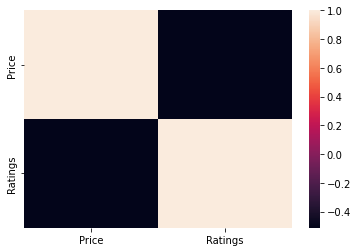

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(df.corr())